In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

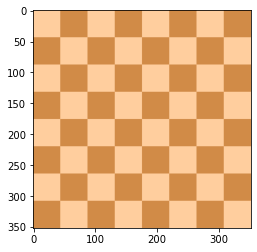

In [2]:
flat_chess = cv2.imread(r'C:\Users\Data\computer vision\flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

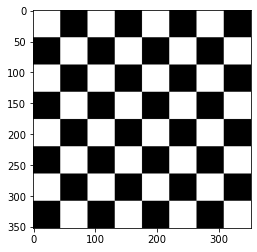

In [3]:
# load grayscale

gray_chess = cv2.imread(r'C:\Users\Data\computer vision\flat_chessboard.png', 0)
plt.imshow(gray_chess, cmap='gray')

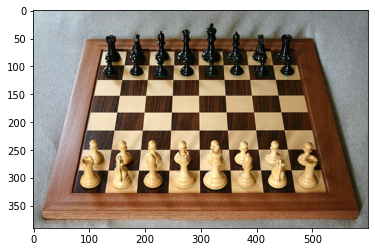

In [4]:
# real chess

real_chess = cv2.imread(r'C:\Users\Data\computer vision\real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

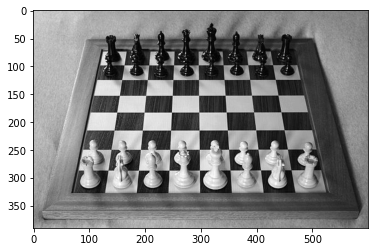

In [5]:
# grayscale

gray_real_chess = cv2.imread(r'C:\Users\Data\computer vision\real_chessboard.jpg', 0)
plt.imshow(gray_real_chess, cmap='gray')

# Haris Corner Detection

In [6]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

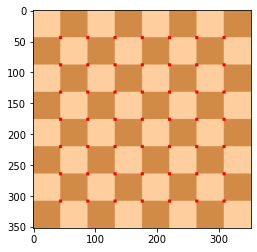

In [7]:
gray = np.float32(gray_chess) # convert the image to float32
dst = cv2.cornerHarris(gray, blockSize = 2, ksize= 3, k =0.04) # apply corner Harris

dst = cv2.dilate(dst, None) # dilate is morphological operator used in erosion

# whatever the result of dst, if dst> 1% of its maximum (dst.max())
flat_chess[dst > 0.01 * dst.max()] = [255,0,0] # rgb channels

plt.imshow(flat_chess)

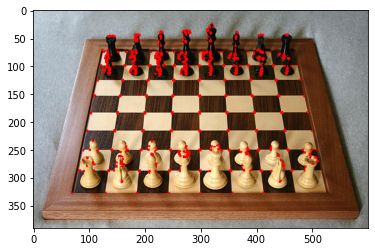

In [8]:
# real chess

gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(gray, blockSize=2, ksize = 3, k =0.04)

dst = cv2.dilate(dst, None)

real_chess[dst > 0.01* dst.max()] = [255, 0,0]

plt.imshow(real_chess)

### Shi-tomasi corner

In [9]:
flat_chess = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\flat_chessboard.png'),cv2.COLOR_BGR2RGB)
gray_chess = cv2.imread(r'C:\Users\Data\computer vision\flat_chessboard.png', 0)

real_chess = cv2.cvtColor(cv2.imread(r'C:\Users\Data\computer vision\real_chessboard.jpg'),cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.imread(r'C:\Users\Data\computer vision\real_chessboard.jpg' ,0)

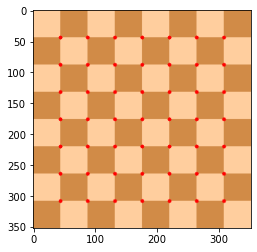

In [10]:
corners = cv2.goodFeaturesToTrack(gray_chess, 64, 0.01,10 )

corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y),3,(255, 0,0), -1)
plt.imshow(flat_chess)

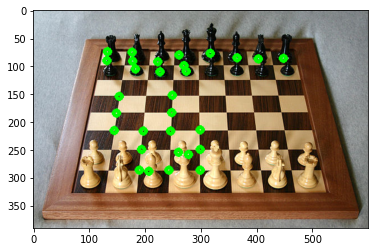

In [13]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 30,0.01, 10 )
corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y),5,(0,255,0), 5)
    
plt.imshow(real_chess)